[Arrays: Working with Images](http://learningtensorflow.com/lesson3/)

In [2]:
import matplotlib.image as mpimg
filename='sample.jpg'
image=mpimg.imread(filename)
print(image.shape)

(499, 467, 3)


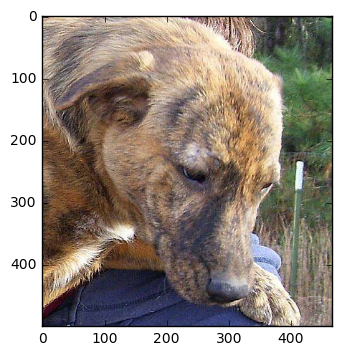

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

## Example

The first transformation we will perform is a transpose, turning the image 90 degrees counter-clockwise

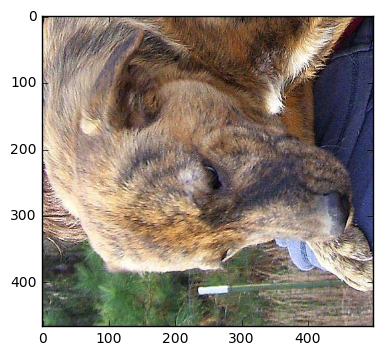

In [8]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
image = mpimg.imread(filename)

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result = session.run(x)


plt.imshow(result)
plt.show()

the new bit is in this line:

`x = tf.transpose(x, perm=[1, 0, 2])`

This line uses TensorFlow’s transpose method, swapping the axes 0 and 1 around using the perm parameter (axis 2 stays where it is).

The next manipulation we will do is a flip (left-right), swapping the pixels from one side to another.

(499, 467, 3)


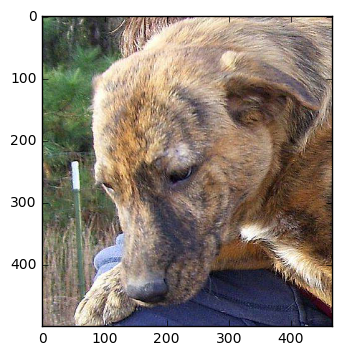

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

`tf.reverse_sequence(input, seq_lengths, seq_dim, batch_dim=None, name=None)`

表示：
1. 将input表示的数据，按照batch_dim轴进行切分（batch_dim=0表示按行切分，batch_dim=1表示按列切分）
2. 对经过batch_dim切分的每个数据块`i`，按照seq_dim轴将前seq_length[i]个元素反转

For this function, it can be best thought of as:

1. Iterate through the array according to `batch_dim`. Setting `batch_dim=0` means we go through the rows (top to bottom).
For each item in the iteration
2. Slice a second dimension, denoted by `seq_dim`. Setting `seq_dim=1` means we go through the columns (left to right).
The slice for the *n*th item in the iteration is denoted by the *n*th item in `seq_lengths`

上面代码里的：

`x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)`

其中height=499, width=467, depth=3

表示：

首先将图片按照行切分为499个数据块（这里seq_lengths是一个数组，存放了499个467），然后将一行里的499个像素左右反转

## Exercises

1) Combine the transposing code with the flip code to rotate clock wise.

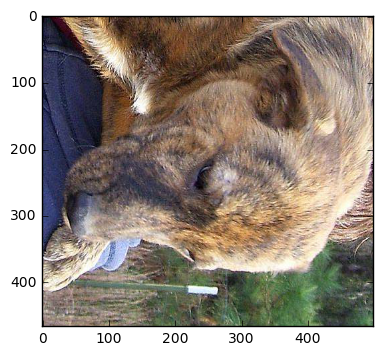

In [10]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    x = tf.reverse_sequence(x, [height] * width, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)
    
plt.imshow(result)
plt.show()

2) Currently, the flip code (using reverse_sequence) requires width to be precomputed. Look at the documentation for the tf.shape function, and use it to compute the width of the x variable within the session.

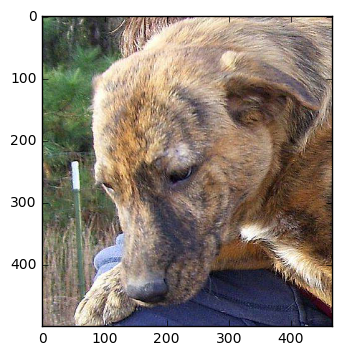

In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
image = mpimg.imread(filename)
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x_shape=tf.shape(x)
model = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(model)
    height,width,depth=session.run(x_shape)
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    result = session.run(x)
    
plt.imshow(result)
plt.show()

3) Perform a “flipud”, which flips the image top-to-bottom.

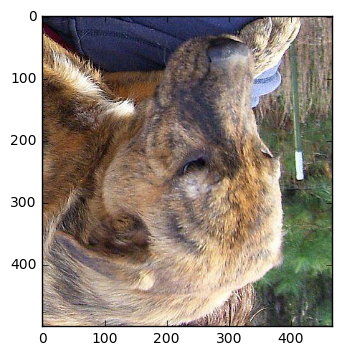

In [48]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.reverse_sequence(x, [height] * width, 0, batch_dim=1)
    session.run(model)
    result = session.run(x)
    
plt.imshow(result)
plt.show()

4) Compute a “mirror”, where the first half of the image is copied, flipped (l-r) and then copied into the second half.